In [11]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

# Quantum Trajectories Simulation of 2-Level Driven-Dissipative system

We consider a two-level system driven at or near resonance in the rotating wave approximation. The goal of this notebook is to provide a blueprint for quantum trajectories simulations using the simplest possible driven-dissipative system with a single decay channel. The Hamiltonian for coherent dynamics is 
$$\hat{H} = -\hbar\delta|e\rangle\langle e| + \frac{\hbar\Omega}{2}(|e\rangle\langle g| + |g\rangle\langle e|)$$
$$\hat{H} = -\hbar\delta\hat{\sigma}_+\hat{\sigma}_- + \frac{\hbar\Omega}{2}(\hat{\sigma}_+ + \hat{\sigma}_-)$$
where $\delta = \nu-\omega$ is the detuning between the field frequency and the transition frequency and $\hat{\sigma}_+ =|e\rangle\langle g|$ and $\hat{\sigma}_- =|g\rangle\langle e|$.

We now include spontaneous emission from the ground to the excited state with some emission rate $\Gamma$. The Linbland jump operator for this situation is $\hat{L} = \sqrt{\Gamma}\hat{\sigma}_-$, with a master equation given by 
$$\dot{\hat{\rho}} = -\frac{i}{\hbar}\left[\hat{H}_{eff},\hat{\rho}\right]'+\Gamma\hat{\sigma}_-\hat{\rho}\hat{\sigma}_+~~~~~~ \hat{H}_{eff} = \hat{H}-\frac{i\hbar\Gamma}{2}\hat{\sigma}_+\hat{\sigma}_-$$
the effective Hamiltonain includes spontaneous emission from the excited state and therefore is non-Hermitian. The notation $\left[\hat{H}_{eff},\hat{\rho}\right]' = \hat{H}_{eff}\hat{\rho}-\hat{\rho}\hat{H}^\dagger_{eff}$ denotes that we should take the hermitian conjugate in the commutator.

### Unitary Evolution: Rabi Oscillations

In [2]:
#Introduce Parameters, set hbar = 1
delta = 0; #detuning
Omega = 10;#units of Gamma 
dt = 0.005; #time step

In [3]:
tarray = np.arange(0,10,dt)

In [4]:
H = np.array([[0,Omega/2],[Omega/2,-delta]]);#Non-dissipative unitary Hamiltonian

In [5]:
wfinit = np.array([[1],[0]])#initialize in ground state
norm=np.linalg.norm(wfinit)#normalize
wfinit = wfinit/norm

In [6]:
wfarray_unitary = [];
pE_unitary = [];
pG_unitary = [];

In [7]:
wf = wfinit;

In [8]:
for el in tarray:
    wftemp=np.dot(linalg.expm(-1j*H*dt),wf)
    norm=np.linalg.norm(wftemp)
    wftemp=wftemp/norm
    wfarray_unitary.append(wftemp)
    wf=wftemp

In [9]:
wfa_u=np.array(wfarray_unitary);

for i in range(0,len(tarray)):
    pE_unitary.append(np.absolute(wfa_u[i,1,0])**2)
    pG_unitary.append(np.absolute(wfa_u[i,0,0])**2)

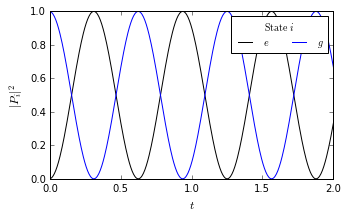

In [12]:
fig = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax = fig.add_subplot(111)
ax.plot(list(tarray),pE_unitary,color='k',label=r'$e$')
ax.plot(list(tarray),pG_unitary,color='b',label=r'$g$')
ax.set_xlim([0,2])
ax.set_ylim([0,1])
ax.set_xlabel(r'$t$',fontsize=12)
ax.set_ylabel(r'$|P_i|^2$',fontsize=12)
ax.legend(loc='upper right',ncol=2,title=r'$\mathrm{State}$ $i$',fontsize=10)
plt.show()

### Dissipative Evolution: Zero Detuning with $\Omega \gg \Gamma$

In [13]:
#Introduce Parameters, set hbar = 1
delta = 0.0; #detuning
Gamma = 1.0; #spontaneous emission decay rate; sets scale
Omega = 10;#units of Gamma 
dt = 0.005; #time step

In [14]:
tarray = np.arange(0,10,dt)

In [15]:
H = np.array([[0,Omega/2],[Omega/2,-delta]]);#Non-dissipative unitary Hamiltonian
Heff = H - np.array([[0,0],[0,1j*Gamma/2]]);#Non-Hermitian Hamiltonian Operator
Jump = np.array([[0,np.sqrt(Gamma)],[0,0]]);#Jump Operator
JumpProb = np.dot(Jump.T,Jump); #Jump Operator Expectation

In [16]:
wfinit = np.array([[1+0j],[0+0j]])#initialize in ground state
norm=np.linalg.norm(wfinit)#normalize
wfinit = wfinit/norm

In [17]:
np.absolute(np.dot(wf.conj().T,np.dot(Jump,wfinit))[0,0])

0.0

In [18]:
wf=wfinit;

In [19]:
wfarray = [];

In [20]:
for el in tarray:
    epsilon = np.random.rand(1)[0];
    #print(epsilon)
    pjump=np.absolute(np.dot(wf.conj().T,np.dot(JumpProb,wf))[0,0])*dt #projection onto excited state
    #print(pjump)
    if epsilon<pjump:
        wftemp=np.dot(Jump,wf)
    else:
        wftemp=np.dot(linalg.expm(-1j*Heff*dt),wf)
    norm=np.linalg.norm(wftemp)
    wftemp=wftemp/norm
    wfarray.append(wftemp)
    wf=wftemp

In [21]:
pE=np.zeros(len(tarray));#Excited state probability Array
pG=np.zeros(len(tarray));#Ground state probability Array
wfa=np.array(wfarray);

for i in range(0,len(tarray)):
    pE[i]=np.absolute(wfa[i,1,0])**2
    pG[i]=np.absolute(wfa[i,0,0])**2

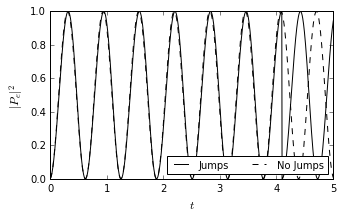

In [22]:
fig = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax = fig.add_subplot(111)
ax.plot(list(tarray),pE,color='k',label='Jumps')
ax.plot(list(tarray),pE_unitary,color='k',linestyle='--',label='No Jumps')
ax.set_xlim([0,5])
ax.set_ylim([0,1])
ax.set_xlabel(r'$t$',fontsize=12)
ax.set_ylabel(r'$|P_e|^2$',fontsize=12)
ax.legend(loc='lower right',ncol=2,title=r'',fontsize=10)
plt.show()

So now we see that when we add in the dissipative part, there are quantum jumps from the excited state back to the ground state at "random" times as decided by our Monte-Carlo algorithm. Notice that the quantum jumps do not occur very often - they are rare events. The next step is to run this over many many iterations or quantum trajectories. 

In [633]:
nruns=200
wfarrayall = np.zeros((nruns,len(tarray)+1,2,1),dtype=np.complex)

In [634]:
wfinit = np.array([[1+0j],[0+0j]])#initialize in ground state
norm=np.linalg.norm(wfinit)#normalize
wfinit = wfinit/norm

In [635]:
for i in range(0,len(wfarrayall)):
    wfarraytemp = [];
    wf=wfinit;
    wfarraytemp.append(wf)#first element is the initial wf
    for el in tarray:
        epsilon = np.random.random_sample();
        #print(epsilon)
        pjump=np.absolute(np.dot(wf.conj().T,np.dot(JumpProb,wf))[0,0])*dt #probability of a jump happening at dt
        #print(pjump)
        if epsilon<pjump:
            wftemp=np.dot(Jump,wf)
        else:
            wftemp=np.dot(linalg.expm(-1j*Heff*dt),wf)
        norm=np.linalg.norm(wftemp)
        wftemp=wftemp/norm
        wfarraytemp.append(wftemp)
        wf=wftemp
    wfarrayall[i]=wfarraytemp

In [636]:
pEAll=np.zeros((nruns,len(tarray)));#Excited state probability Array
pGAll=np.zeros((nruns,len(tarray)));#Ground state probability Array
wfa2=np.array(wfarrayall)

for j in range(0,nruns):
    for i in range(0,len(tarray)):
        pEAll[j,i]=np.absolute(wfa2[j,i,1,0])**2
        pGAll[j,i]=np.absolute(wfa2[j,i,0,0])**2

In [637]:
color_iter = itertools.cycle(['#FDD835', '#FF5733', '#C70039', '#000000'])#'sunset' 
labels=np.arange(0,nruns,1);

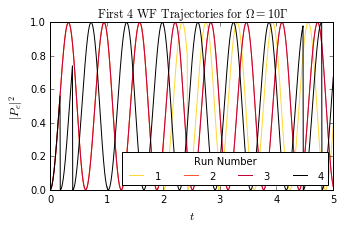

In [649]:
fig = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax = fig.add_subplot(111)
for i, (y,c,l) in enumerate(zip(pEAll[0:4],color_iter,labels)):
    ax.plot(list(tarray),y,color=c,label=l+1)
ax.set_xlim([0,5])
ax.set_ylim([0,1])
ax.set_xlabel(r'$t$',fontsize=12)
ax.set_ylabel(r'$|P_e|^2$',fontsize=12)
ax.set_title(r' $\mathrm{First}$ $4$ $\mathrm{WF}$ $\mathrm{Trajectories}$ $\mathrm{for}$ $\Omega = 10\Gamma$',fontsize=12)
ax.legend(loc='lower right',ncol=nruns,title=r'Run Number',fontsize=10)
plt.show()

Now we just need to average over all of these trajectories at each time step.

In [639]:
pEAvg = np.zeros(len(tarray));
pGAvg = np.zeros(len(tarray));
for i in range(0,len(tarray)):
    pEAvg[i]=np.mean(pEAll.T[i])
    pGAvg[i]=np.mean(pGAll.T[i])

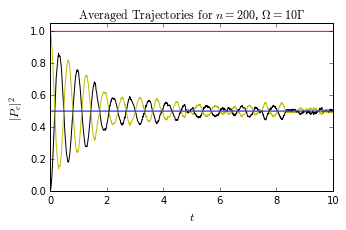

In [650]:
fig = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax = fig.add_subplot(111)
ax.plot(list(tarray),list(pEAvg),color='k',label='average e')
ax.plot(list(tarray),list(pGAvg),color='y',label='average g')
ax.plot(list(tarray),list(pGAvg+pEAvg),color='r',label='average')
ax.plot(list(tarray),list(0.5*np.ones(len(tarray))),color='b')
ax.set_xlim([0,10])
ax.set_ylim([0,1.05])
ax.set_xlabel(r'$t$',fontsize=12)
ax.set_ylabel(r'$|P_e|^2$',fontsize=12)
ax.set_title(r'$\mathrm{Averaged}$ $\mathrm{Trajectories}$ $\mathrm{for}$ $n = 200$, $\Omega = 10\Gamma$',fontsize=12)
plt.show()

Hmm... my code seems to be stabilizing to about 0.6 or even a little above that instead of 0.5 as I would expect. I think I have a bug in my code somewhere, probably. The other possibility is that I need to run over more trajectories. This seems unlikely, though. **Ok, found the problem - when I was computing the values for the population probabilities, it was reporting $\sqrt{|P_e|^2}$ because of the way Python computes np.mean. All I had to do was square that result and now we have what we would expect.**